In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [14]:
#importing data and getting shape
df = pd.read_csv("/home/papineau/Breast_cancer/data.csv")
df.shape

(569, 33)

In [15]:
df.head()
# we can see here that last column is having NaN values so we have to resolve it

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
# dropping irrelevant features 
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [17]:
# splitting the data
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# encoding the diagnosis column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) # 1 = M, 0 = B

# splitting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Dimensionality Reduction using PCA

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

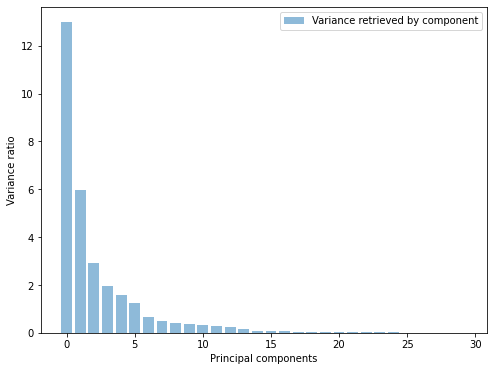

In [19]:
pca = PCA() #This graph gives us the distribution of maximum information at each component
pca.fit_transform(X_train) 
pca_var = pca.explained_variance_
plt.figure(figsize = (8, 6))
plt.bar(range(30), pca_var, alpha = 0.5, align = 'center', label = 'Variance retrieved by component')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show() 

In [20]:
pca = PCA(n_components = 10) #This is used to decompose or reduce the dimension into the specified dimensions given in the components
pca.fit(X_train)
X_train_pca = pca.transform(X_train) 
pca.explained_variance_ratio_ 

array([0.4316748 , 0.19845652, 0.09733159, 0.06531574, 0.05212151,
       0.0419896 , 0.02263461, 0.01682669, 0.0129469 , 0.0120941 ])

In [21]:
np.sum(pca.explained_variance_ratio_)*100 #The percentage of the values imply that the 10 components retrieves close to 95% percent of the information from the original dataset that had 30 features

95.13920521735784

In [22]:
X_train.shape # Before Pca

(398, 30)

In [23]:
X_train_pca.shape #After Pca As you see the features have been readuced from 30 to 10

(398, 10)

In [24]:
X1 = pd.DataFrame(data = X_train_pca, columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"])
X1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-3.084842,-2.158704,-0.339875,-0.216630,1.545359,0.258008,0.571077,-0.137962,-0.100367,-0.269436
1,-2.182647,-0.617571,0.447208,-0.150818,2.860346,-0.353044,-0.098260,0.222224,-0.335081,-0.221412
2,2.049959,2.328953,1.169407,-1.814647,-0.115599,0.280841,0.211097,-0.176826,-0.740189,-0.214450
3,-2.809267,-0.950791,-0.305102,-0.380816,0.547114,1.202716,-0.277676,-0.093055,0.380406,0.372333
4,-1.913537,-1.072582,0.498365,1.311554,-0.204212,0.064969,-0.051336,-0.019707,0.153882,-0.166299


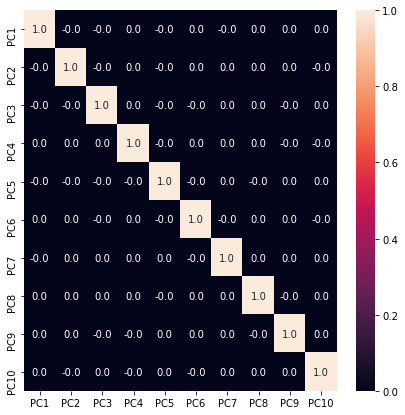

In [25]:
plt.figure(figsize = (7, 7))
sns.heatmap(X1.corr(), annot= True, fmt = '.1f')
plt.show() #Thus the extracted faetures show zero correlation with each other

In [26]:
y1 = pd.DataFrame(y_train, columns = ["diagnosis"])
y1.head()
print(y1.shape)

(398, 1)


In [27]:
X1["common"] = range(398)
y1["common"] = range(398)
dataset = pd.merge(X1, y1, on = ["common"])
dataset = dataset.drop('common', axis=1)
dataset.shape

(398, 11)

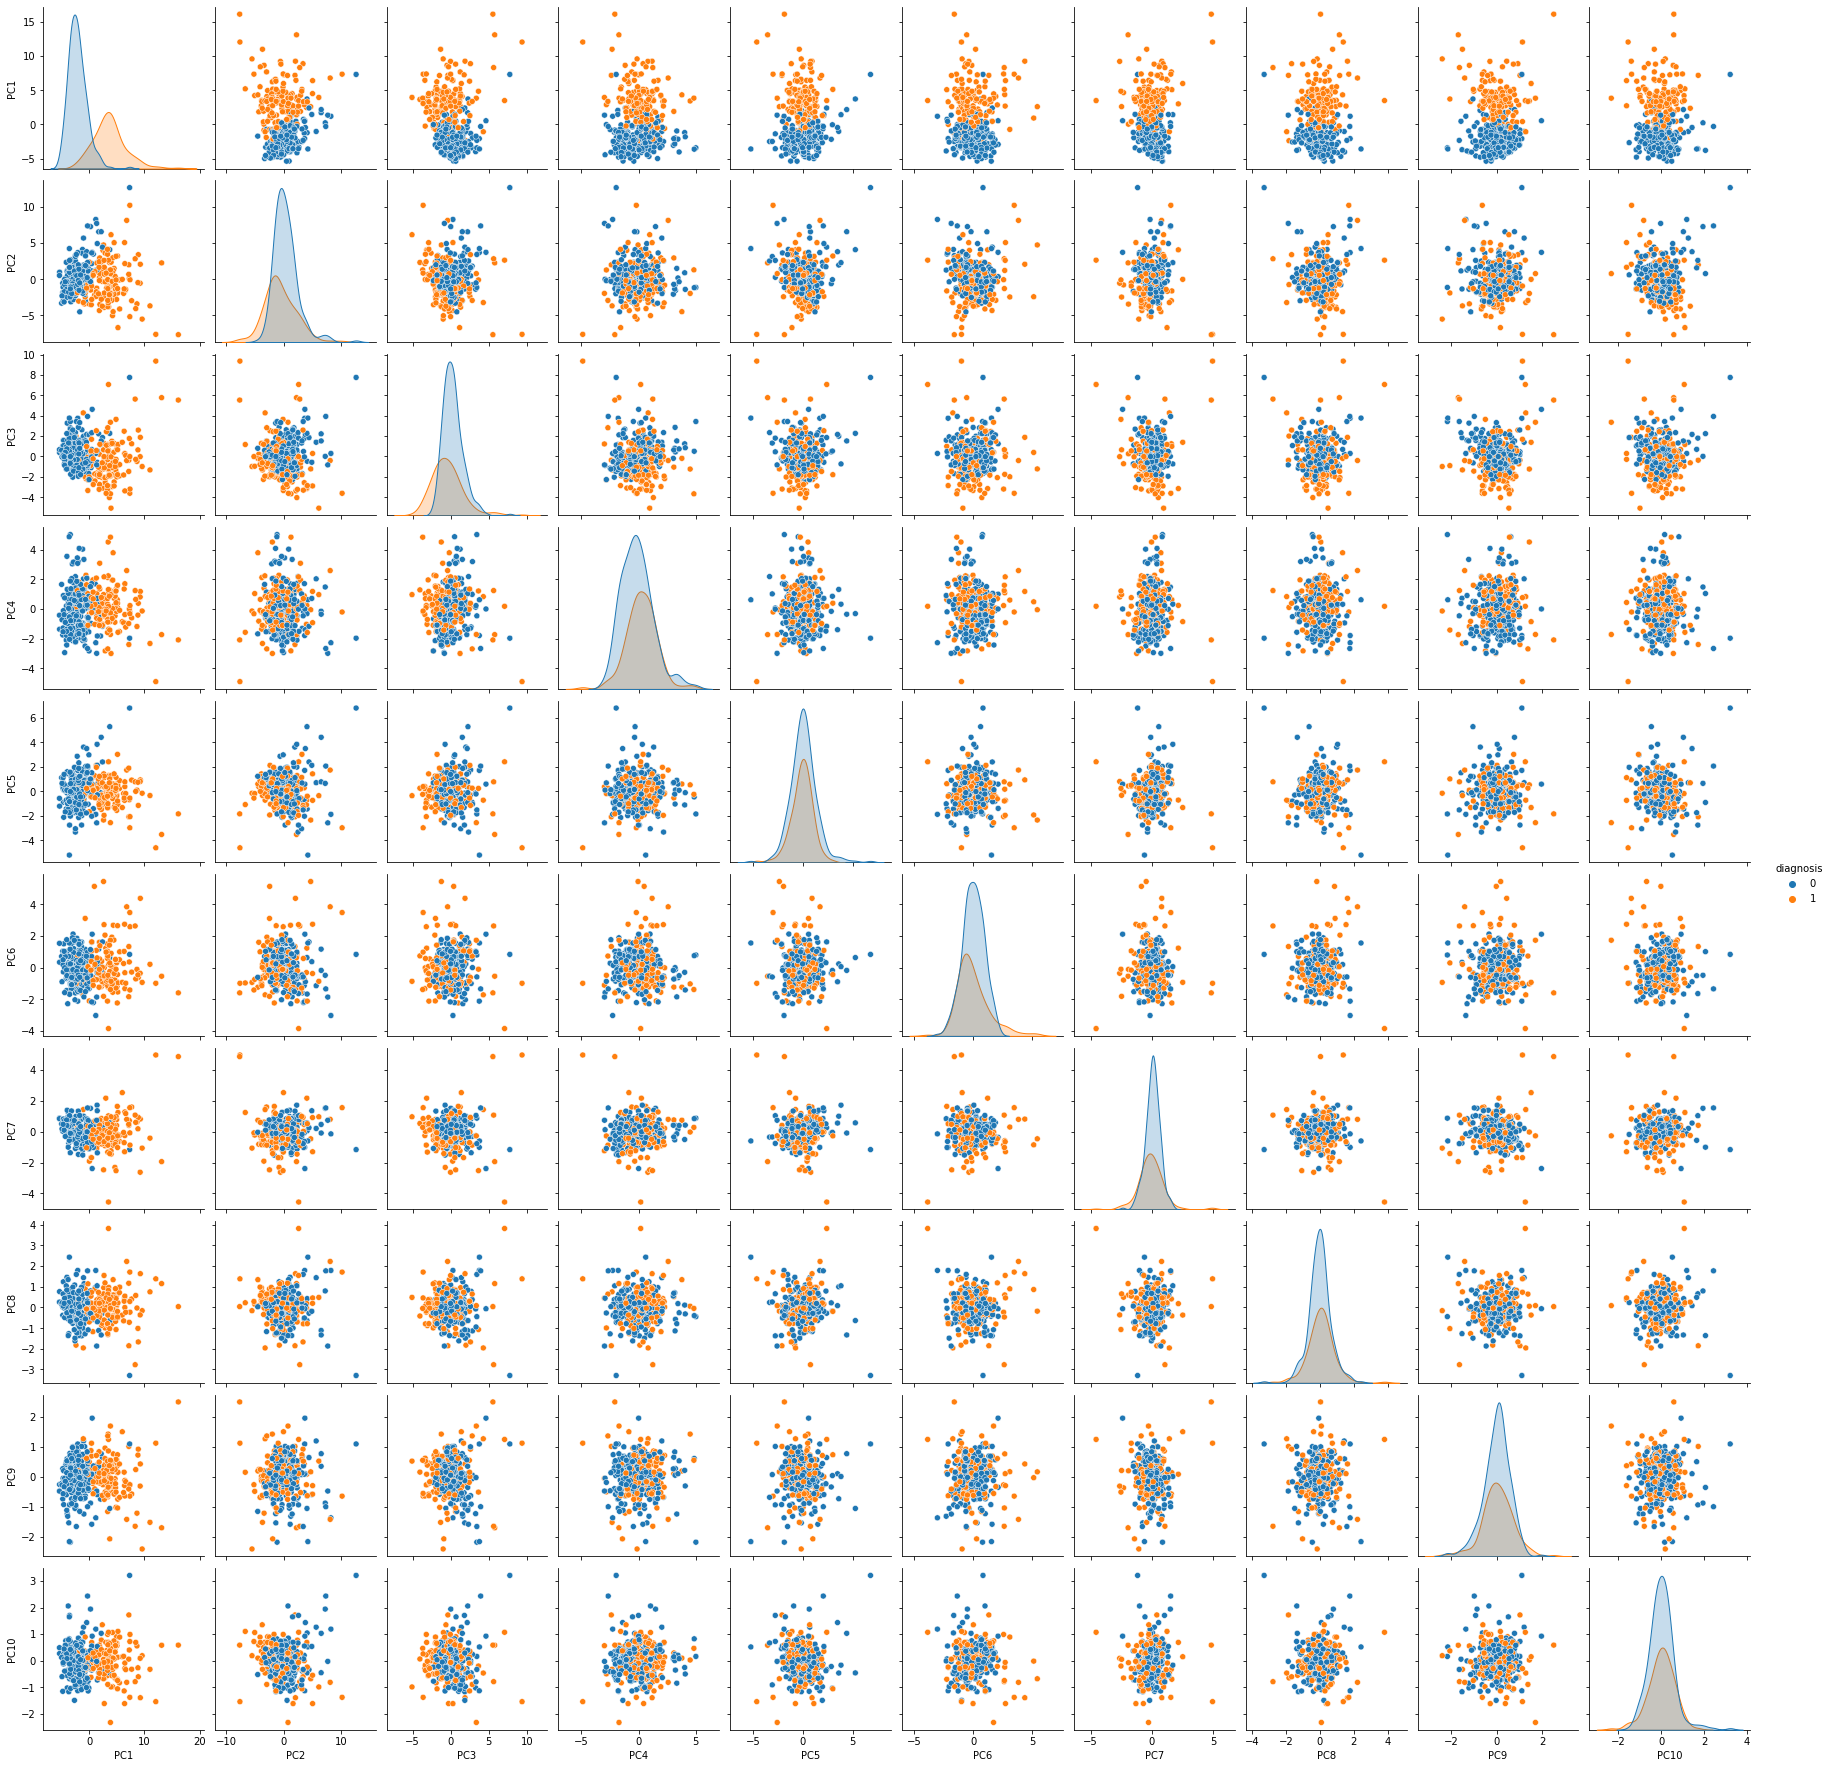

In [28]:
sns.pairplot(dataset,hue='diagnosis')

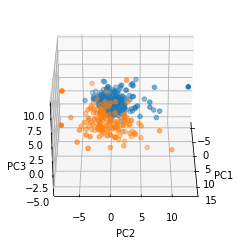

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [29]:
#%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for x in dataset.diagnosis.unique():
    ax.scatter(dataset.PC1[dataset.diagnosis==x], dataset.PC2[dataset.diagnosis==x], dataset.PC3[dataset.diagnosis==x], label=x)
    
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)
    
plt.show()

Above 3D visualization shows that derived principal components have separability in target class.

In [30]:
# standard scaling test data
X_test = scaler.transform(X_test) 
# transforming test data with pca from above obtained parameters
X_test_pca = pca.transform(X_test)

# Training and Validating Models

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train_pca, y_train)

yl_pred = logreg.predict(X_test_pca)

print('Confusion Matrix:\n', confusion_matrix(y_test, yl_pred))
print("Accuracy score:", accuracy_score(y_test, yl_pred))
print('Classification Report:\n', classification_report(y_test, yl_pred))

Confusion Matrix:
 [[108   0]
 [  1  62]]
Accuracy score: 0.9941520467836257
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.98      0.99        63

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



### Hyperparameter Tuning

In [51]:
param_grid=[{'penalty':['l2',],
            'C':[0.01,0.1,1,10,100],
            'solver':['liblinear','sag','newton-cg','lbfgs'],
            'max_iter':[100,1000,2500,5000]}]

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(logreg,param_grid=param_grid,cv=10,scoring='accuracy',verbose=True)
grid.fit(X_train_pca,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l2'],
                          'solver': ['liblinear', 'sag', 'newton-cg',
                                     'lbfgs']}],
             scoring='accuracy', verbose=True)

In [52]:
print(grid.best_params_)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


### After Hyperparameter Tuning

In [54]:
logreg = LogisticRegression(C=0.1, max_iter=100, penalty='l2', solver='liblinear' )

logreg.fit(X_train_pca, y_train)

yl_pred = logreg.predict(X_test_pca)

print('Confusion Matrix:\n', confusion_matrix(y_test, yl_pred))
print("Accuracy score:", accuracy_score(y_test, yl_pred))
print('Classification Report:\n', classification_report(y_test, yl_pred))

Confusion Matrix:
 [[108   0]
 [  1  62]]
Accuracy score: 0.9941520467836257
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.98      0.99        63

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



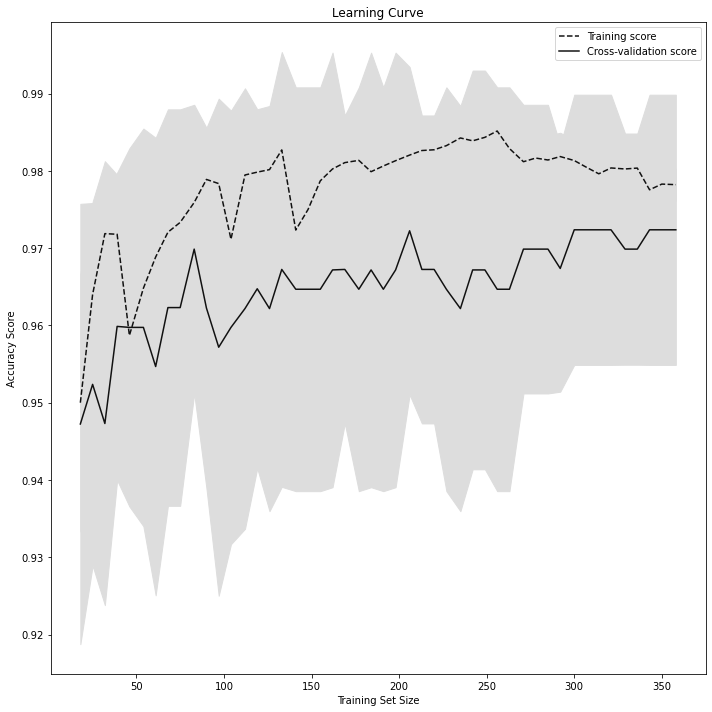

In [56]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(logreg, X_train_pca, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [57]:
# Stratified KFold

X1 = pd.DataFrame(X)
y1 = pd.DataFrame(y)

accuracyl = []

skf = StratifiedKFold(n_splits = 10, random_state = None)
skf.get_n_splits(X1, y1)
for train_index, test_index in skf.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]
    
    # applying PCA
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    pca = PCA(n_components = 10)
    pca.fit(X1_train)
    X1_train = pca.transform(X1_train)

    X1_test = scaler.transform(X1_test)
    X1_test = pca.transform(X1_test)

    logreg.fit(X1_train, y1_train)
    yl_pred = logreg.predict(X1_test)
    accuracyl.append(accuracy_score(yl_pred, y1_test))
    
    
print(np.array(accuracyl).mean())

0.9788847117794484


## SVM(Support Vector Machine)



In [58]:
from sklearn import svm
sclf = svm.SVC()
sclf.fit(X_train_pca, y_train)

ys_pred = sclf.predict(X_test_pca)

print('Confusion Matrix:\n', confusion_matrix(y_test, ys_pred))
print("Accuracy score:", accuracy_score(y_test, ys_pred))
print('Classification Report:\n', classification_report(y_test, ys_pred))

Confusion Matrix:
 [[106   2]
 [  2  61]]
Accuracy score: 0.9766081871345029
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### Hyperparameter Tuning

In [60]:
param_grid=[{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','poly'],
            }]

grid=GridSearchCV(sclf,param_grid=param_grid,cv=10,scoring='accuracy',verbose=True)
grid.fit(X_train_pca,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'linear', 'poly']}],
             scoring='accuracy', verbose=True)

In [61]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


### After Hyperparameter Tuning

In [62]:
sclf = svm.SVC(C=1000, gamma= 0.0001, kernel='rbf', probability = True)
sclf.fit(X_train_pca, y_train)

ys_pred = sclf.predict(X_test_pca)

print('Confusion Matrix:\n', confusion_matrix(y_test, ys_pred))
print("Accuracy score:", accuracy_score(y_test, ys_pred))
print('Classification Report:\n', classification_report(y_test, ys_pred))

Confusion Matrix:
 [[108   0]
 [  1  62]]
Accuracy score: 0.9941520467836257
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.98      0.99        63

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



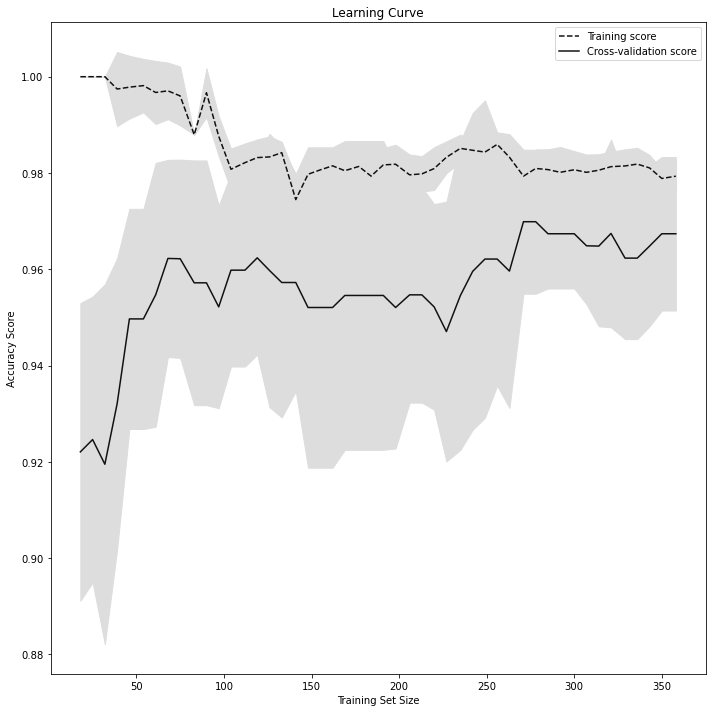

In [63]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(sclf, X_train_pca, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes = np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [64]:
# Stratified KFold
accuracys = []

skf = StratifiedKFold(n_splits = 10, random_state = None)
skf.get_n_splits(X1, y1)
for train_index, test_index in skf.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    # applying PCA
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    pca = PCA(n_components = 10)
    pca.fit(X1_train)
    X1_train = pca.transform(X1_train)

    X1_test = scaler.transform(X1_test)
    X1_test = pca.transform(X1_test)
    
    sclf.fit(X1_train, y1_train)
    ys_pred = sclf.predict(X1_test)
    accuracys.append(accuracy_score(ys_pred, y1_test))
    
    
print(np.array(accuracys).mean())

0.9753132832080199


# Naive Bayes

In [65]:
from sklearn.naive_bayes import BernoulliNB
BernNb = BernoulliNB()
BernNb.fit(X_train_pca, y_train)

yn_pred = BernNb.predict(X_test_pca)

print('Confusion Matrix:\n', confusion_matrix(y_test, yn_pred))
print("Accuracy score:", accuracy_score(y_test, yn_pred))
print('Classification Report:\n', classification_report(y_test, yn_pred))

Confusion Matrix:
 [[100   8]
 [  5  58]]
Accuracy score: 0.9239766081871345
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       108
           1       0.88      0.92      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171



### Hyperparameter Tuning

In [66]:
param_grid = [{'binarize':[0.0,0.001,0.01,0.1,1,10,100], 
               'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0], 
               'fit_prior' : [True, False],
               'class_prior': [None, [.1,.9],[.2, .8]]
             }]

grid = GridSearchCV(BernNb,param_grid=param_grid,cv=10,scoring='accuracy',verbose=True)
grid.fit(X_train_pca,y_train)

Fitting 10 folds for each of 378 candidates, totalling 3780 fits


GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid=[{'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0,
                                    2.0, 10.0],
                          'binarize': [0.0, 0.001, 0.01, 0.1, 1, 10, 100],
                          'class_prior': [None, [0.1, 0.9], [0.2, 0.8]],
                          'fit_prior': [True, False]}],
             scoring='accuracy', verbose=True)

In [67]:
print(grid.best_params_)

{'alpha': 10.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}


### After Hyperparameter Tuning

In [68]:
BernNb=BernoulliNB(alpha=10,binarize=0.0,fit_prior=True)
BernNb.fit(X_train_pca, y_train)

yn_pred = BernNb.predict(X_test_pca)

print('Confusion Matrix:\n', confusion_matrix(y_test, yn_pred))
print("Accuracy score:", accuracy_score(y_test, yn_pred))
print('Classification Report:\n', classification_report(y_test, yn_pred))

Confusion Matrix:
 [[100   8]
 [  6  57]]
Accuracy score: 0.9181286549707602
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       108
           1       0.88      0.90      0.89        63

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



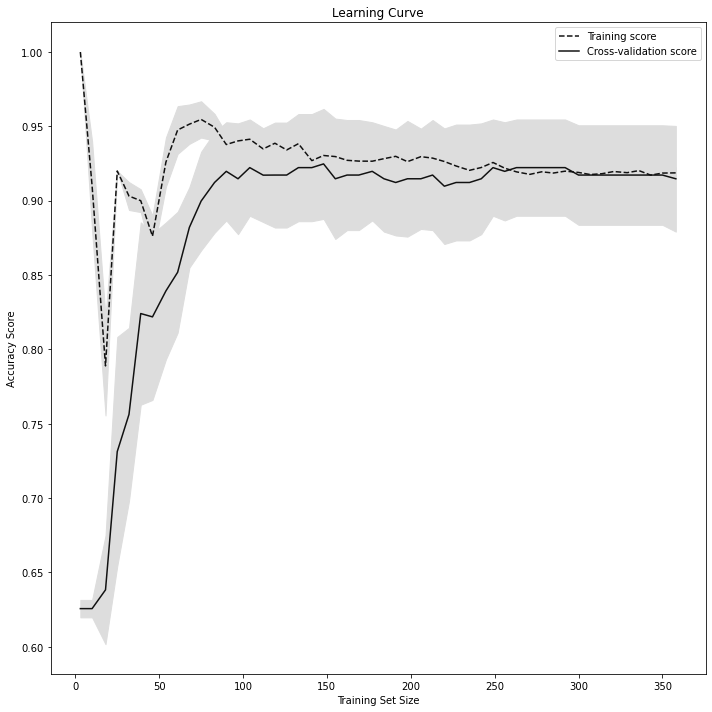

In [45]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(BernNb, X_train_pca, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [69]:
# Stratified KFold
accuracyn = []

skf = StratifiedKFold(n_splits = 10, random_state = None)
skf.get_n_splits(X1, y1)
for train_index, test_index in skf.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]
    
    # applying PCA
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    pca = PCA(n_components = 10)
    pca.fit(X1_train)
    X1_train = pca.transform(X1_train)

    X1_test = scaler.transform(X1_test)
    X1_test = pca.transform(X1_test)

    BernNb.fit(X1_train, y1_train)
    yn_pred = BernNb.predict(X1_test)
    accuracyn.append(accuracy_score(yn_pred, y1_test))
    
    
print(np.array(accuracyn).mean())

0.912124060150376


### Box Plot of Accuracies achieved from 10 Fold Stratified K Fold

In [75]:
df = pd.DataFrame({'Logistic Regression': accuracyl, 
                   'SVM': accuracys,
                   'Naive Bayes': accuracyn
                    })
df

,Logistic Regression,SVM,Naive Bayes
0,1.000000,1.000000,0.929825
1,0.947368,0.964912,0.824561
2,0.982456,0.964912,0.929825
3,0.964912,0.964912,0.912281
4,1.000000,1.000000,0.912281
5,0.982456,0.964912,0.929825
6,0.947368,0.964912,0.912281
7,1.000000,1.000000,0.947368
8,1.000000,1.000000,0.912281
9,0.964286,0.928571,0.910714


Text(0.5, 1.0, 'Comparing 10 fold CV accuracies of classifiers')

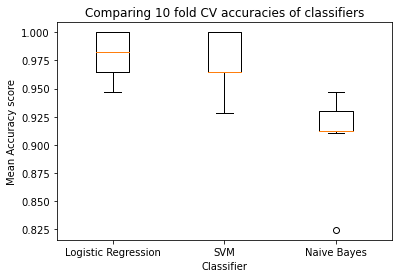

In [76]:
plt.figure()
plt.boxplot([df['Logistic Regression'], df['SVM'], df['Naive Bayes']]);
plt.xticks([1, 2, 3], ['Logistic Regression', 'SVM', 'Naive Bayes'])
plt.xlabel('Classifier');
plt.ylabel('Mean Accuracy score')
plt.title('Comparing 10 fold CV accuracies of classifiers')

## Evaluation of models using Roc

In [78]:
# calculation of probabilities
lr_probs = logreg.predict_proba(X_test_pca)
svc_probs = sclf.predict_proba(X_test_pca)
nb_probs = BernNb.predict_proba(X_test_pca)

# Keeping only True Positive and False Positive 
lr_probs = lr_probs[:, 1]
svc_probs = svc_probs[:, 1]
nb_probs = nb_probs[:, 1]

# calculating roc auc score to evaluate each ones performance
lr_auc = roc_auc_score(y_test, lr_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

In [79]:
print("Logistic Regression: ", lr_auc)
print("SVM: ", svc_auc)
print("Naive Bayes: ", nb_auc)
# so from below we see that auc roc score of Logistic Regresion is highest

Logistic Regression:  0.9986772486772486
SVM:  0.9973544973544973
Naive Bayes:  0.9620076425631982


In [80]:
# Calculating True Positive Rate and False Positive Rate for Each Models
lr_fpr, lr_tpr, thr_l = roc_curve(y_test, lr_probs)
svc_fpr, svc_tpr, thr_s = roc_curve(y_test, svc_probs)
nb_fpr, nb_tpr, thr_n = roc_curve(y_test, nb_probs)

In [ ]:
# Plotting ROC Curve
plt.figure(figsize = (10, 10))

plt.plot(lr_fpr, lr_tpr, marker = ".", label = 'Logistic Regression', color = 'green')
plt.plot(svc_fpr, svc_tpr, marker = ".", label = 'SVM', color = 'blue')
plt.plot(nb_fpr, nb_tpr, marker = ".", label = 'Naive Bayes', color = 'red')

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()